# hw2: Решающие деревья

*Спасибо великому курсу великого Евгения Соколова*

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплементацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

Все данные, на которых будут обучаться модели, вы можете найти на диске.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Неэффективная и/или неоригинальная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Заполненный ноутбук ```hw2-trees.ipynb``` и модуль с реализованными функциями и классами ```hw2code.py``` необходимо загрузить на свой Github. Затем нужно оставить комментарий в Google-таблице с оценками в столбце <<hw2>> в строке со своей фамилией о том, что вы выполнили работу с указанием ника на Kaggle.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [10]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [11]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

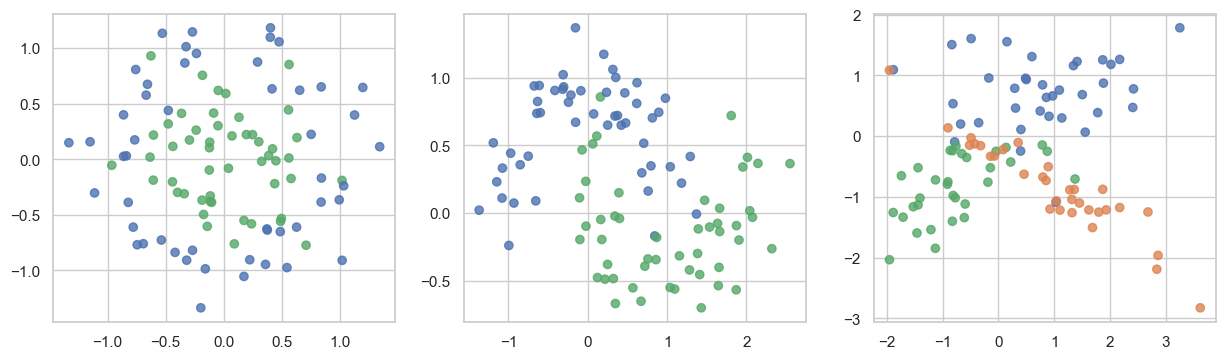

In [12]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [13]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)
    plt.show()

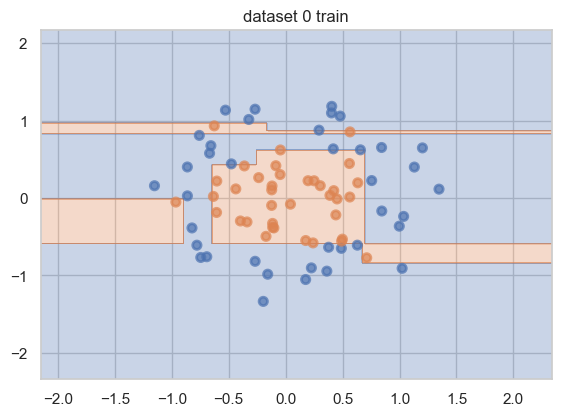

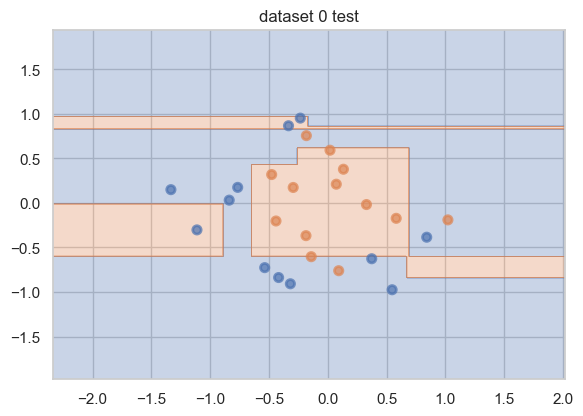

Accuracy of dataset 0 (train):1.0 (test):0.72


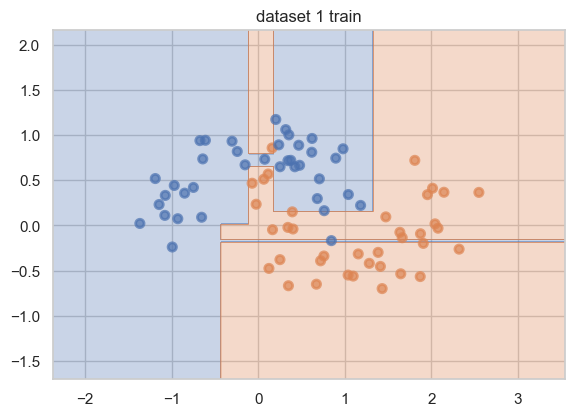

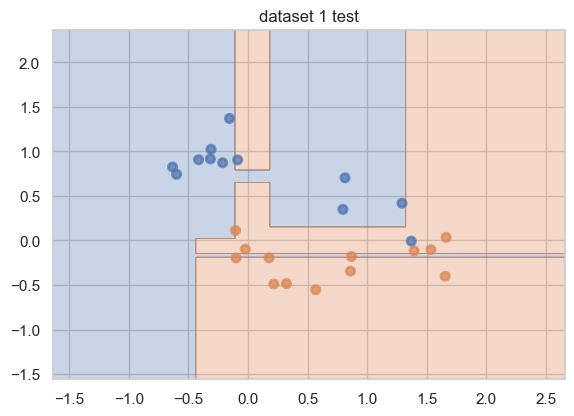

Accuracy of dataset 1 (train):1.0 (test):0.88


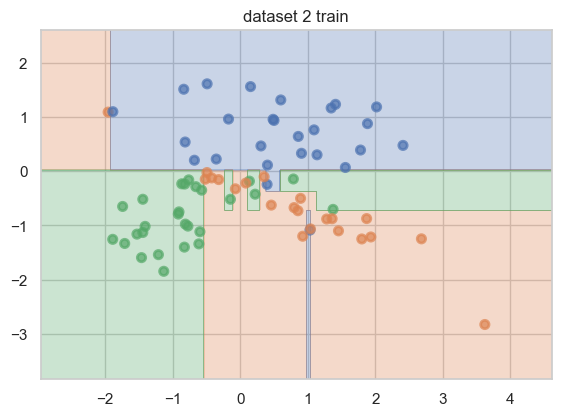

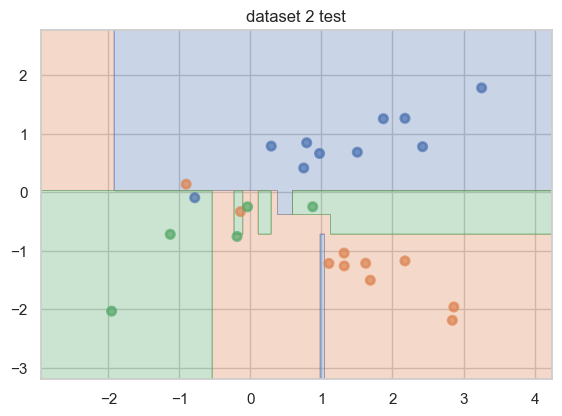

Accuracy of dataset 2 (train):1.0 (test):0.8


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
for i, (X, y) in enumerate(datasets):
    clf = DecisionTreeClassifier()
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    clf.fit(X_train, y_train)
    plt.title(f'dataset {i} train')
    plot_surface(clf, X_train, y_train)
    plt.title(f'dataset {i} test')
    plot_surface(clf, X_test, y_test)
    y_pred_train = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    y_pred_test = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    print(f'Accuracy of dataset {i} (train):{train_accuracy} (test):{test_accuracy}')

__Ответ:__ Вывод: переобучение на всех датасетах(т.к. accuracy на train всегда 1.0 и больше чем на test)

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

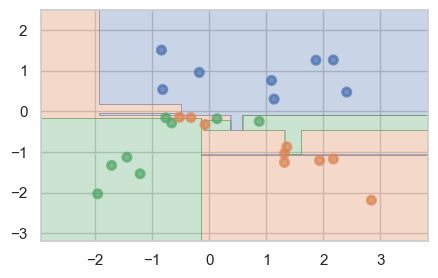

dataset=0 max_depth=None min_samples_leaf=1 accuracy(test)=0.84 accuracy(train):1.0


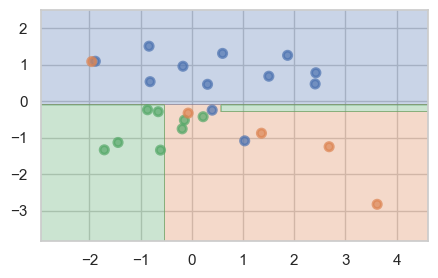

dataset=0 max_depth=None min_samples_leaf=2 accuracy(test)=0.76 accuracy(train):0.9333333333333333


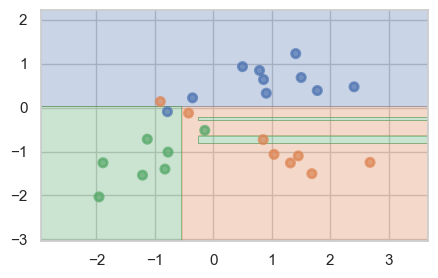

dataset=0 max_depth=None min_samples_leaf=3 accuracy(test)=0.84 accuracy(train):0.9066666666666666


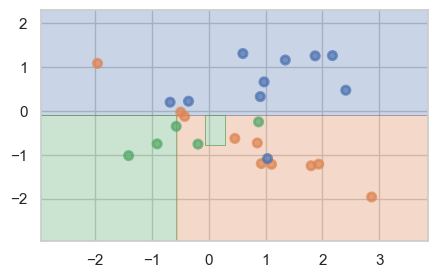

dataset=0 max_depth=None min_samples_leaf=4 accuracy(test)=0.8 accuracy(train):0.92


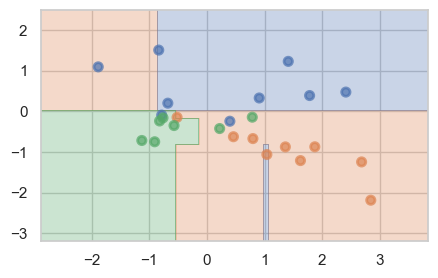

dataset=0 max_depth=5 min_samples_leaf=1 accuracy(test)=0.76 accuracy(train):0.9466666666666667


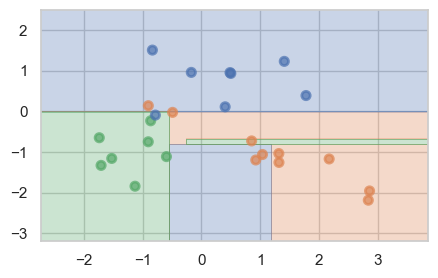

dataset=0 max_depth=5 min_samples_leaf=2 accuracy(test)=0.8 accuracy(train):0.88


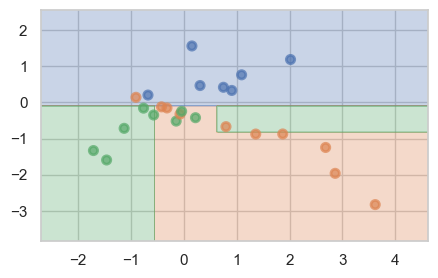

dataset=0 max_depth=5 min_samples_leaf=3 accuracy(test)=0.8 accuracy(train):0.8933333333333333


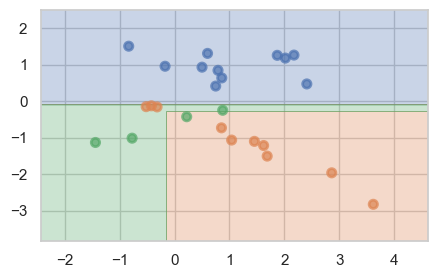

dataset=0 max_depth=5 min_samples_leaf=4 accuracy(test)=0.84 accuracy(train):0.8933333333333333


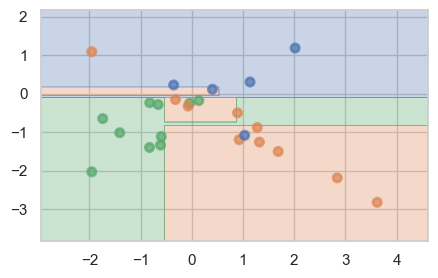

dataset=0 max_depth=6 min_samples_leaf=1 accuracy(test)=0.76 accuracy(train):0.9466666666666667


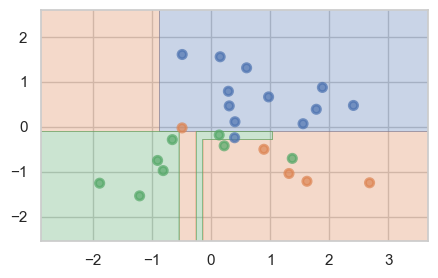

dataset=0 max_depth=6 min_samples_leaf=2 accuracy(test)=0.84 accuracy(train):0.9466666666666667


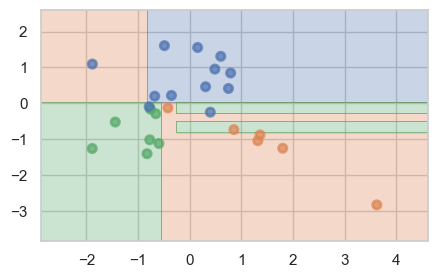

dataset=0 max_depth=6 min_samples_leaf=3 accuracy(test)=0.84 accuracy(train):0.9066666666666666


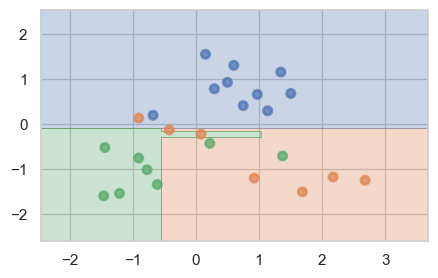

dataset=0 max_depth=6 min_samples_leaf=4 accuracy(test)=0.84 accuracy(train):0.9066666666666666


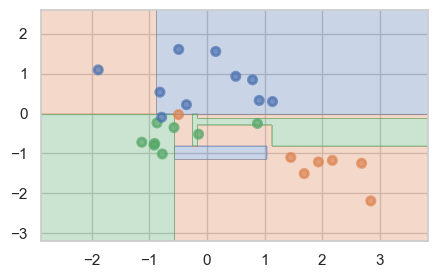

dataset=0 max_depth=7 min_samples_leaf=1 accuracy(test)=0.88 accuracy(train):0.96


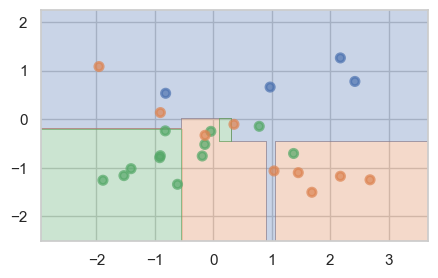

dataset=0 max_depth=7 min_samples_leaf=2 accuracy(test)=0.64 accuracy(train):0.96


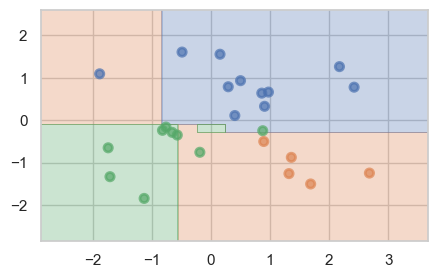

dataset=0 max_depth=7 min_samples_leaf=3 accuracy(test)=0.88 accuracy(train):0.88


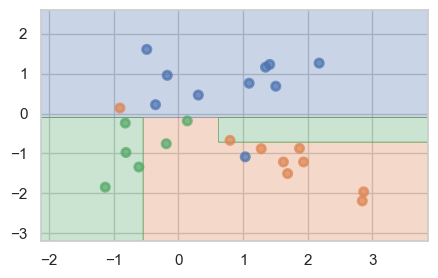

dataset=0 max_depth=7 min_samples_leaf=4 accuracy(test)=0.8 accuracy(train):0.9066666666666666


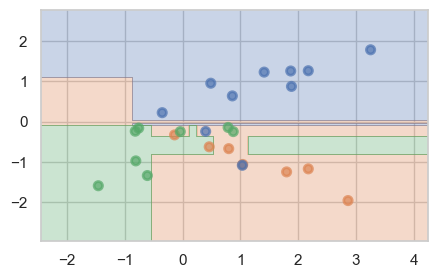

dataset=1 max_depth=None min_samples_leaf=1 accuracy(test)=0.76 accuracy(train):1.0


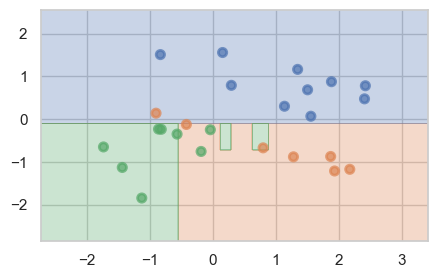

dataset=1 max_depth=None min_samples_leaf=2 accuracy(test)=0.84 accuracy(train):0.92


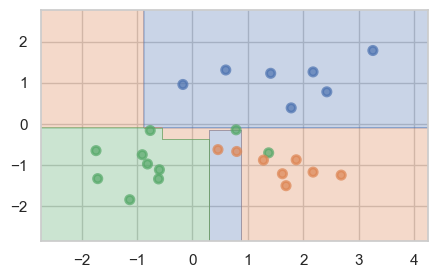

dataset=1 max_depth=None min_samples_leaf=3 accuracy(test)=0.84 accuracy(train):0.9066666666666666


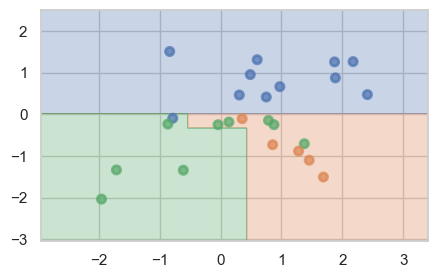

dataset=1 max_depth=None min_samples_leaf=4 accuracy(test)=0.76 accuracy(train):0.9333333333333333


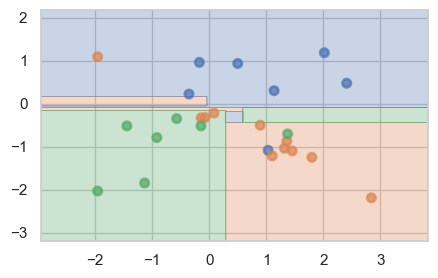

dataset=1 max_depth=5 min_samples_leaf=1 accuracy(test)=0.76 accuracy(train):1.0


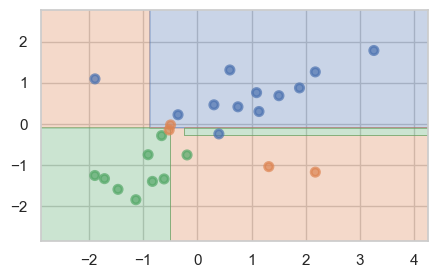

dataset=1 max_depth=5 min_samples_leaf=2 accuracy(test)=0.8 accuracy(train):0.92


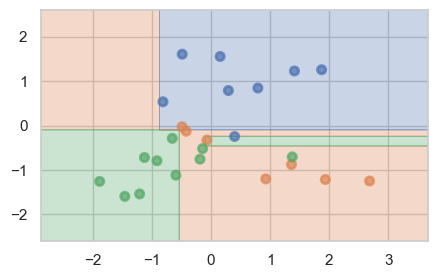

dataset=1 max_depth=5 min_samples_leaf=3 accuracy(test)=0.76 accuracy(train):0.9466666666666667


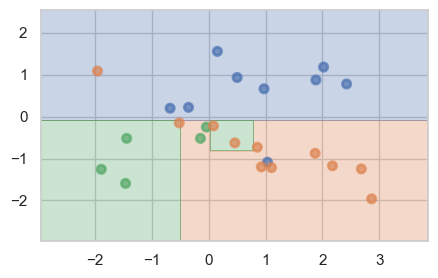

dataset=1 max_depth=5 min_samples_leaf=4 accuracy(test)=0.72 accuracy(train):0.9066666666666666


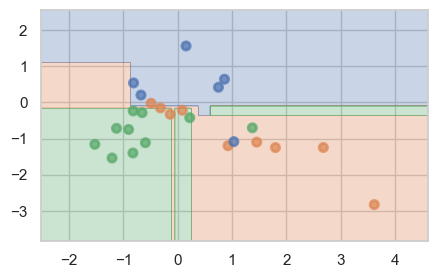

dataset=1 max_depth=6 min_samples_leaf=1 accuracy(test)=0.76 accuracy(train):1.0


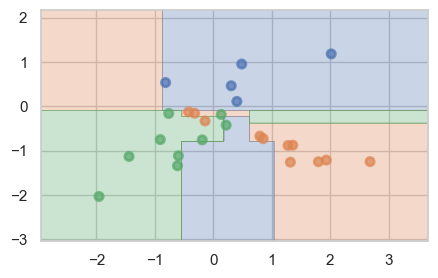

dataset=1 max_depth=6 min_samples_leaf=2 accuracy(test)=0.88 accuracy(train):0.92


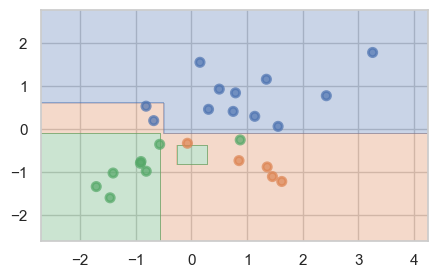

dataset=1 max_depth=6 min_samples_leaf=3 accuracy(test)=0.88 accuracy(train):0.8933333333333333


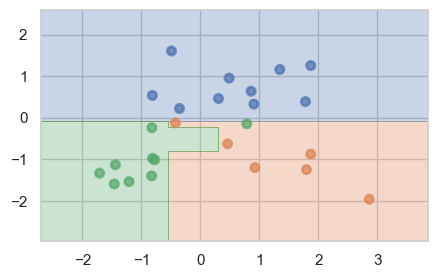

dataset=1 max_depth=6 min_samples_leaf=4 accuracy(test)=0.96 accuracy(train):0.8666666666666667


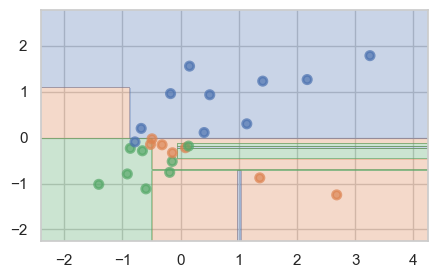

dataset=1 max_depth=7 min_samples_leaf=1 accuracy(test)=0.8 accuracy(train):1.0


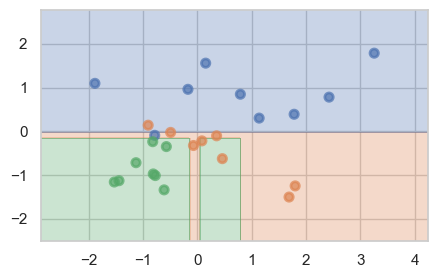

dataset=1 max_depth=7 min_samples_leaf=2 accuracy(test)=0.8 accuracy(train):0.9066666666666666


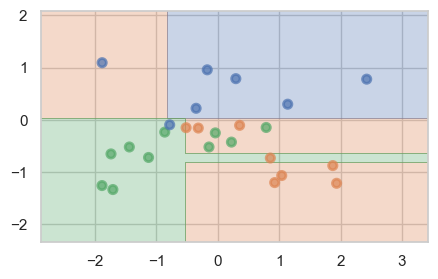

dataset=1 max_depth=7 min_samples_leaf=3 accuracy(test)=0.72 accuracy(train):0.92


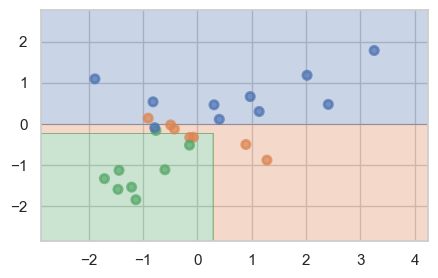

dataset=1 max_depth=7 min_samples_leaf=4 accuracy(test)=0.8 accuracy(train):0.9066666666666666


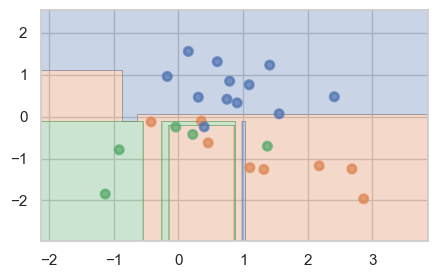

dataset=2 max_depth=None min_samples_leaf=1 accuracy(test)=0.84 accuracy(train):1.0


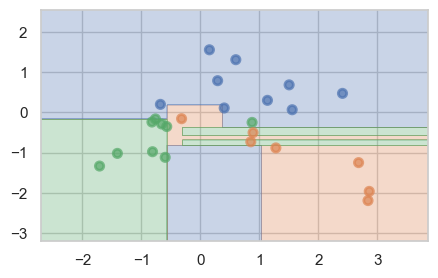

dataset=2 max_depth=None min_samples_leaf=2 accuracy(test)=0.84 accuracy(train):0.92


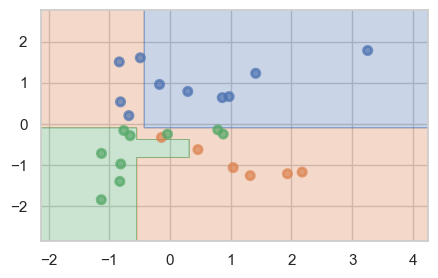

dataset=2 max_depth=None min_samples_leaf=3 accuracy(test)=0.72 accuracy(train):0.92


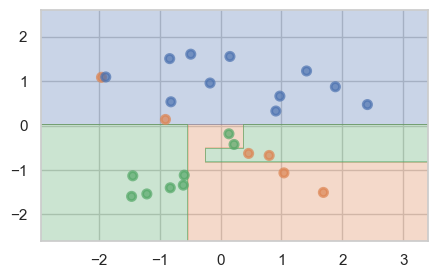

dataset=2 max_depth=None min_samples_leaf=4 accuracy(test)=0.76 accuracy(train):0.92


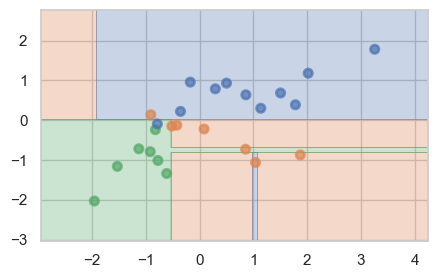

dataset=2 max_depth=5 min_samples_leaf=1 accuracy(test)=0.84 accuracy(train):0.9066666666666666


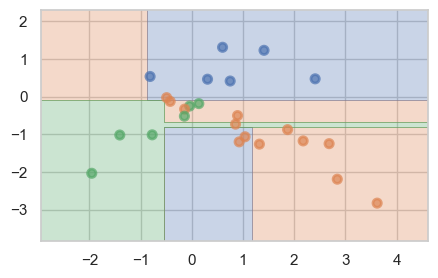

dataset=2 max_depth=5 min_samples_leaf=2 accuracy(test)=0.72 accuracy(train):0.92


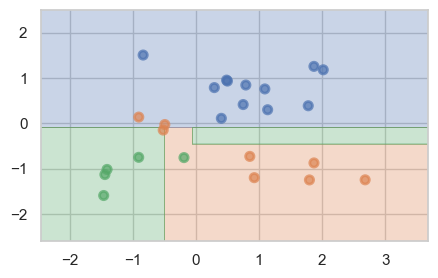

dataset=2 max_depth=5 min_samples_leaf=3 accuracy(test)=0.84 accuracy(train):0.9066666666666666


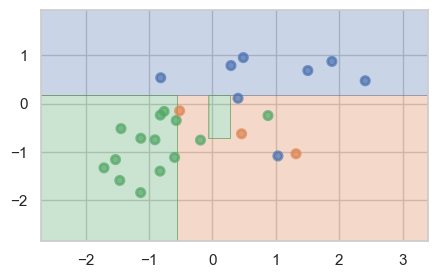

dataset=2 max_depth=5 min_samples_leaf=4 accuracy(test)=0.84 accuracy(train):0.88


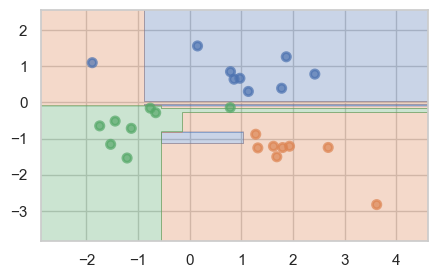

dataset=2 max_depth=6 min_samples_leaf=1 accuracy(test)=0.92 accuracy(train):0.9466666666666667


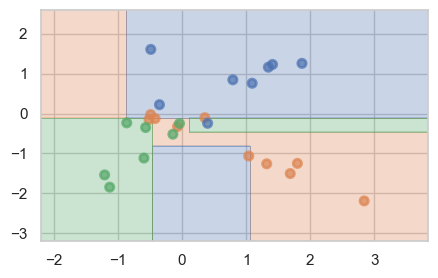

dataset=2 max_depth=6 min_samples_leaf=2 accuracy(test)=0.72 accuracy(train):0.9466666666666667


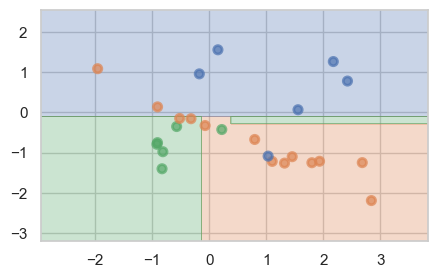

dataset=2 max_depth=6 min_samples_leaf=3 accuracy(test)=0.76 accuracy(train):0.92


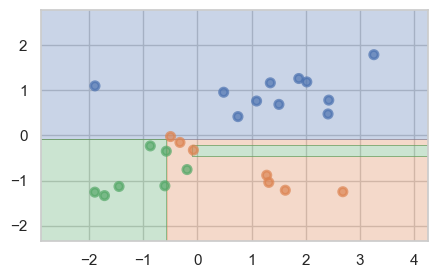

dataset=2 max_depth=6 min_samples_leaf=4 accuracy(test)=0.88 accuracy(train):0.8933333333333333


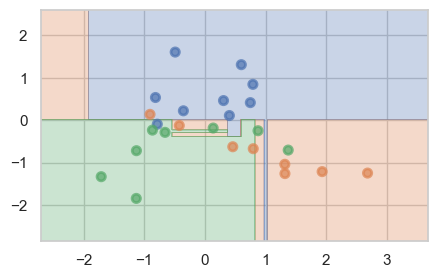

dataset=2 max_depth=7 min_samples_leaf=1 accuracy(test)=0.72 accuracy(train):1.0


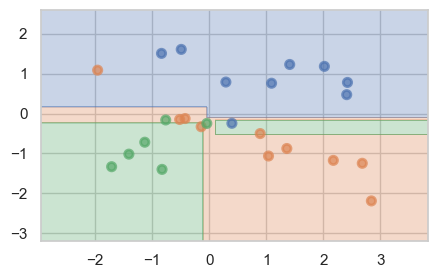

dataset=2 max_depth=7 min_samples_leaf=2 accuracy(test)=0.76 accuracy(train):0.9333333333333333


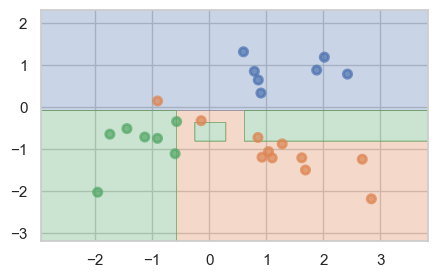

dataset=2 max_depth=7 min_samples_leaf=3 accuracy(test)=0.92 accuracy(train):0.8933333333333333


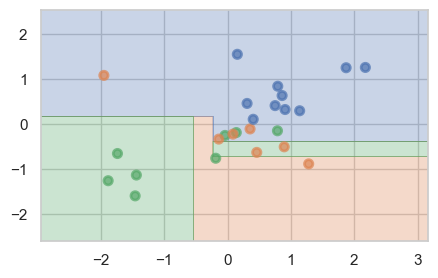

dataset=2 max_depth=7 min_samples_leaf=4 accuracy(test)=0.6 accuracy(train):0.92


In [15]:
max_depths = [None, 5, 6, 7]
min_samples_leafs = [1, 2, 3, 4]
for i, dataset in enumerate(datasets):
    for depth in max_depths:
        for min_sample in min_samples_leafs:
            plt.figure(figsize=(5, 3))
            clf = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=min_sample)
            X_train, X_test, y_train, y_test = train_test_split(X, y)
            clf.fit(X_train, y_train)
            plot_surface(clf, X_test, y_test)
            y_pred_test = clf.predict(X_test)
            y_pred_train = clf.predict(X_train)
            accuracy_test = accuracy_score(y_test, y_pred_test)
            accuracy_train = accuracy_score(y_train, y_pred_train)
            print(f'dataset={i} max_depth={depth} min_samples_leaf={min_sample} accuracy(test)={accuracy_test} accuracy(train):{accuracy_train}')


__Ответ:__ при max_depth != None чаще всего показываются более гладкие результаты(видно более четкое разделение(без маленьких областей определенного признака)), по датасетам:

0. accuracy при max_depth=6-7 показывает хорошие результаты, accuracy на test почти равна accuracy на train.
1. при max_depth = 7 accuracy на test практически равен accuracy на train(в каких то моментах даже равен).  Хорошая обобщающая способность.
2. при max_depth=5 min_samples_leaf=4 accuracy на test больше чем на train.

При слишком больших значениях min_samples_leaf модель начинает недообучаться.
Оптимальная глубина для датасетов 0 и 1 = 6.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw2code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу students.csv (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     258 non-null    float64
 1   SCG     258 non-null    float64
 2   STR     258 non-null    float64
 3   LPR     258 non-null    float64
 4   PEG     258 non-null    float64
 5   UNS     258 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 12.2 KB


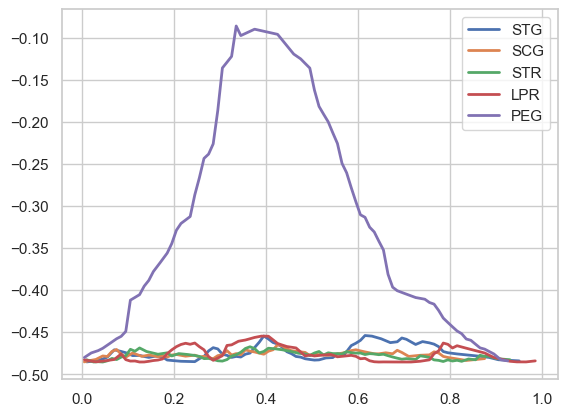

In [16]:
import importlib
import hw2code
importlib.reload(hw2code)
from hw2code import DecisionTree, find_best_split

dataset_students = pd.read_csv('datasets/students.csv')
dataset_students.info()
dataset_students_target  = dataset_students['UNS']
dataset_students_feature_names = dataset_students.columns
dataset_students_feature_names = dataset_students_feature_names.drop('UNS')

for feature_name in dataset_students_feature_names:
    feature = dataset_students[feature_name]
    thresholds, ginis, threshold_best, gini_best = find_best_split(feature, dataset_students_target)
    plt.plot(thresholds, ginis, label=feature_name, linewidth=2)


plt.legend()
plt.show()



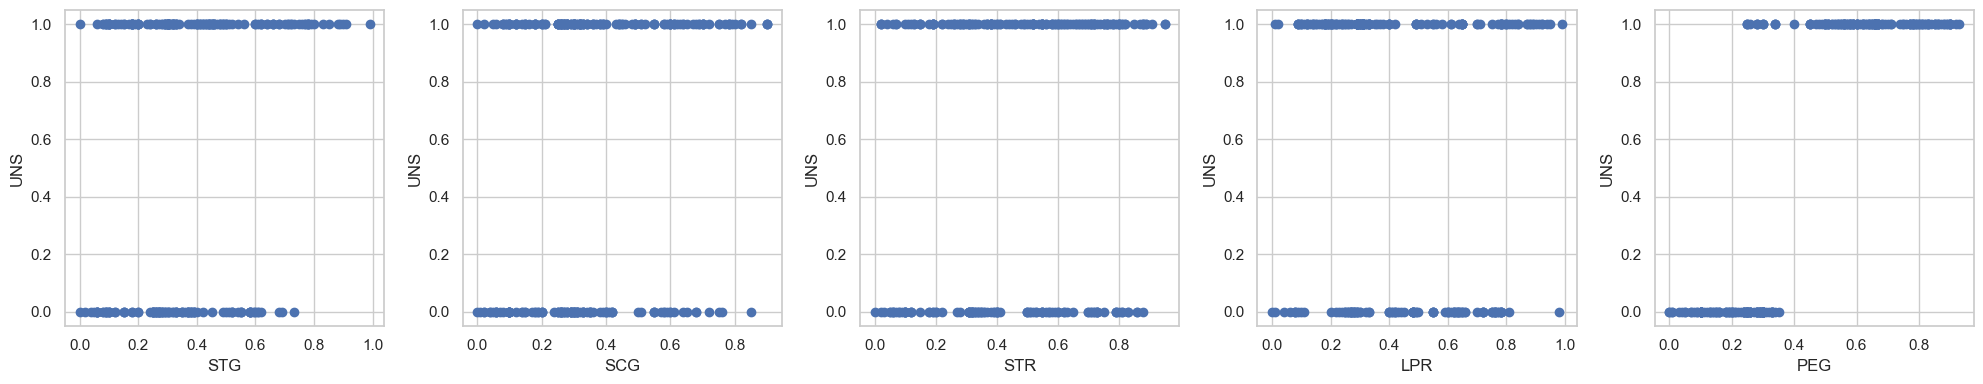

In [17]:
fig, ax = plt.subplots(1, 5, figsize=(20, 4))

for i, feature_name in enumerate(dataset_students_feature_names):
    ax[i].scatter(dataset_students[feature_name], dataset_students_target)
    ax[i].set_ylabel('UNS')
    ax[i].set_xlabel(feature_name)
plt.tight_layout()
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** так как мы должны максимизировать Q(Функционал качества или критерий Джини), то можно выделить класс 'PEG'. По scatter графику также видно, что можно четко разделить на 2 поддерева(PEG < 0.49 и PEG >= 0.4). На других же признаках не видно четкого разделения на поддеревья, значения признаков постоянно "скачут" с 0 до 1.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw2code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [21]:
from sklearn.preprocessing import LabelEncoder
import importlib
import hw2code
importlib.reload(hw2code)
from hw2code import DecisionTree, find_best_split


dataset_mushrooms = pd.read_csv('datasets/agaricus-lepiota.data')
encoders = []
encode_dataset_mushrooms = dataset_mushrooms.copy()
for feature in dataset_mushrooms.columns:
    encoder = LabelEncoder()
    encoders.append(encoder)
    encode_dataset_mushrooms[feature] = encoder.fit_transform(dataset_mushrooms[feature])


features = encode_dataset_mushrooms.iloc[:, 1:]
target = encode_dataset_mushrooms.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.5)
tree = DecisionTree(['categorical'] * features.shape[1])
tree.fit(X_train.values, y_train.values)
y_pred = tree.predict(X_test.values)
print(accuracy_score(y_test, y_pred))

1.0


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

[0.6625, 0.6625, 0.6625, 0.6625]
[0.6625, 0.6625, 0.6625, 0.6625]
[0.6625, 0.6625, 0.6625, 0.6625]
[0.6625, 0.6625, 0.6625, 0.6625]
[0.6958333333333333, 0.6958333333333333, 0.6958333333333333, 0.6958333333333333]
[0.6958333333333333, 0.6958333333333333, 0.6958333333333333, 0.6958333333333333]
[0.6958333333333333, 0.6958333333333333, 0.6958333333333333, 0.6958333333333333]
[0.6958333333333333, 0.6958333333333333, 0.6958333333333333, 0.6958333333333333]
[0.7916666666666666, 0.7916666666666666, 0.7916666666666666, 0.7916666666666666]
[0.7916666666666666, 0.7916666666666666, 0.7916666666666666, 0.7916666666666666]
[0.7916666666666666, 0.7916666666666666, 0.7916666666666666, 0.7916666666666666]
[0.7916666666666666, 0.7916666666666666, 0.7916666666666666, 0.7916666666666666]
[0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.925]
[0.9291666666666667, 0.9291666666666667, 0.9291666666666667, 0.9291666666666667]
[0.9208333333333333, 0.9208333333333333, 0.9208333333333333, 0.92083333

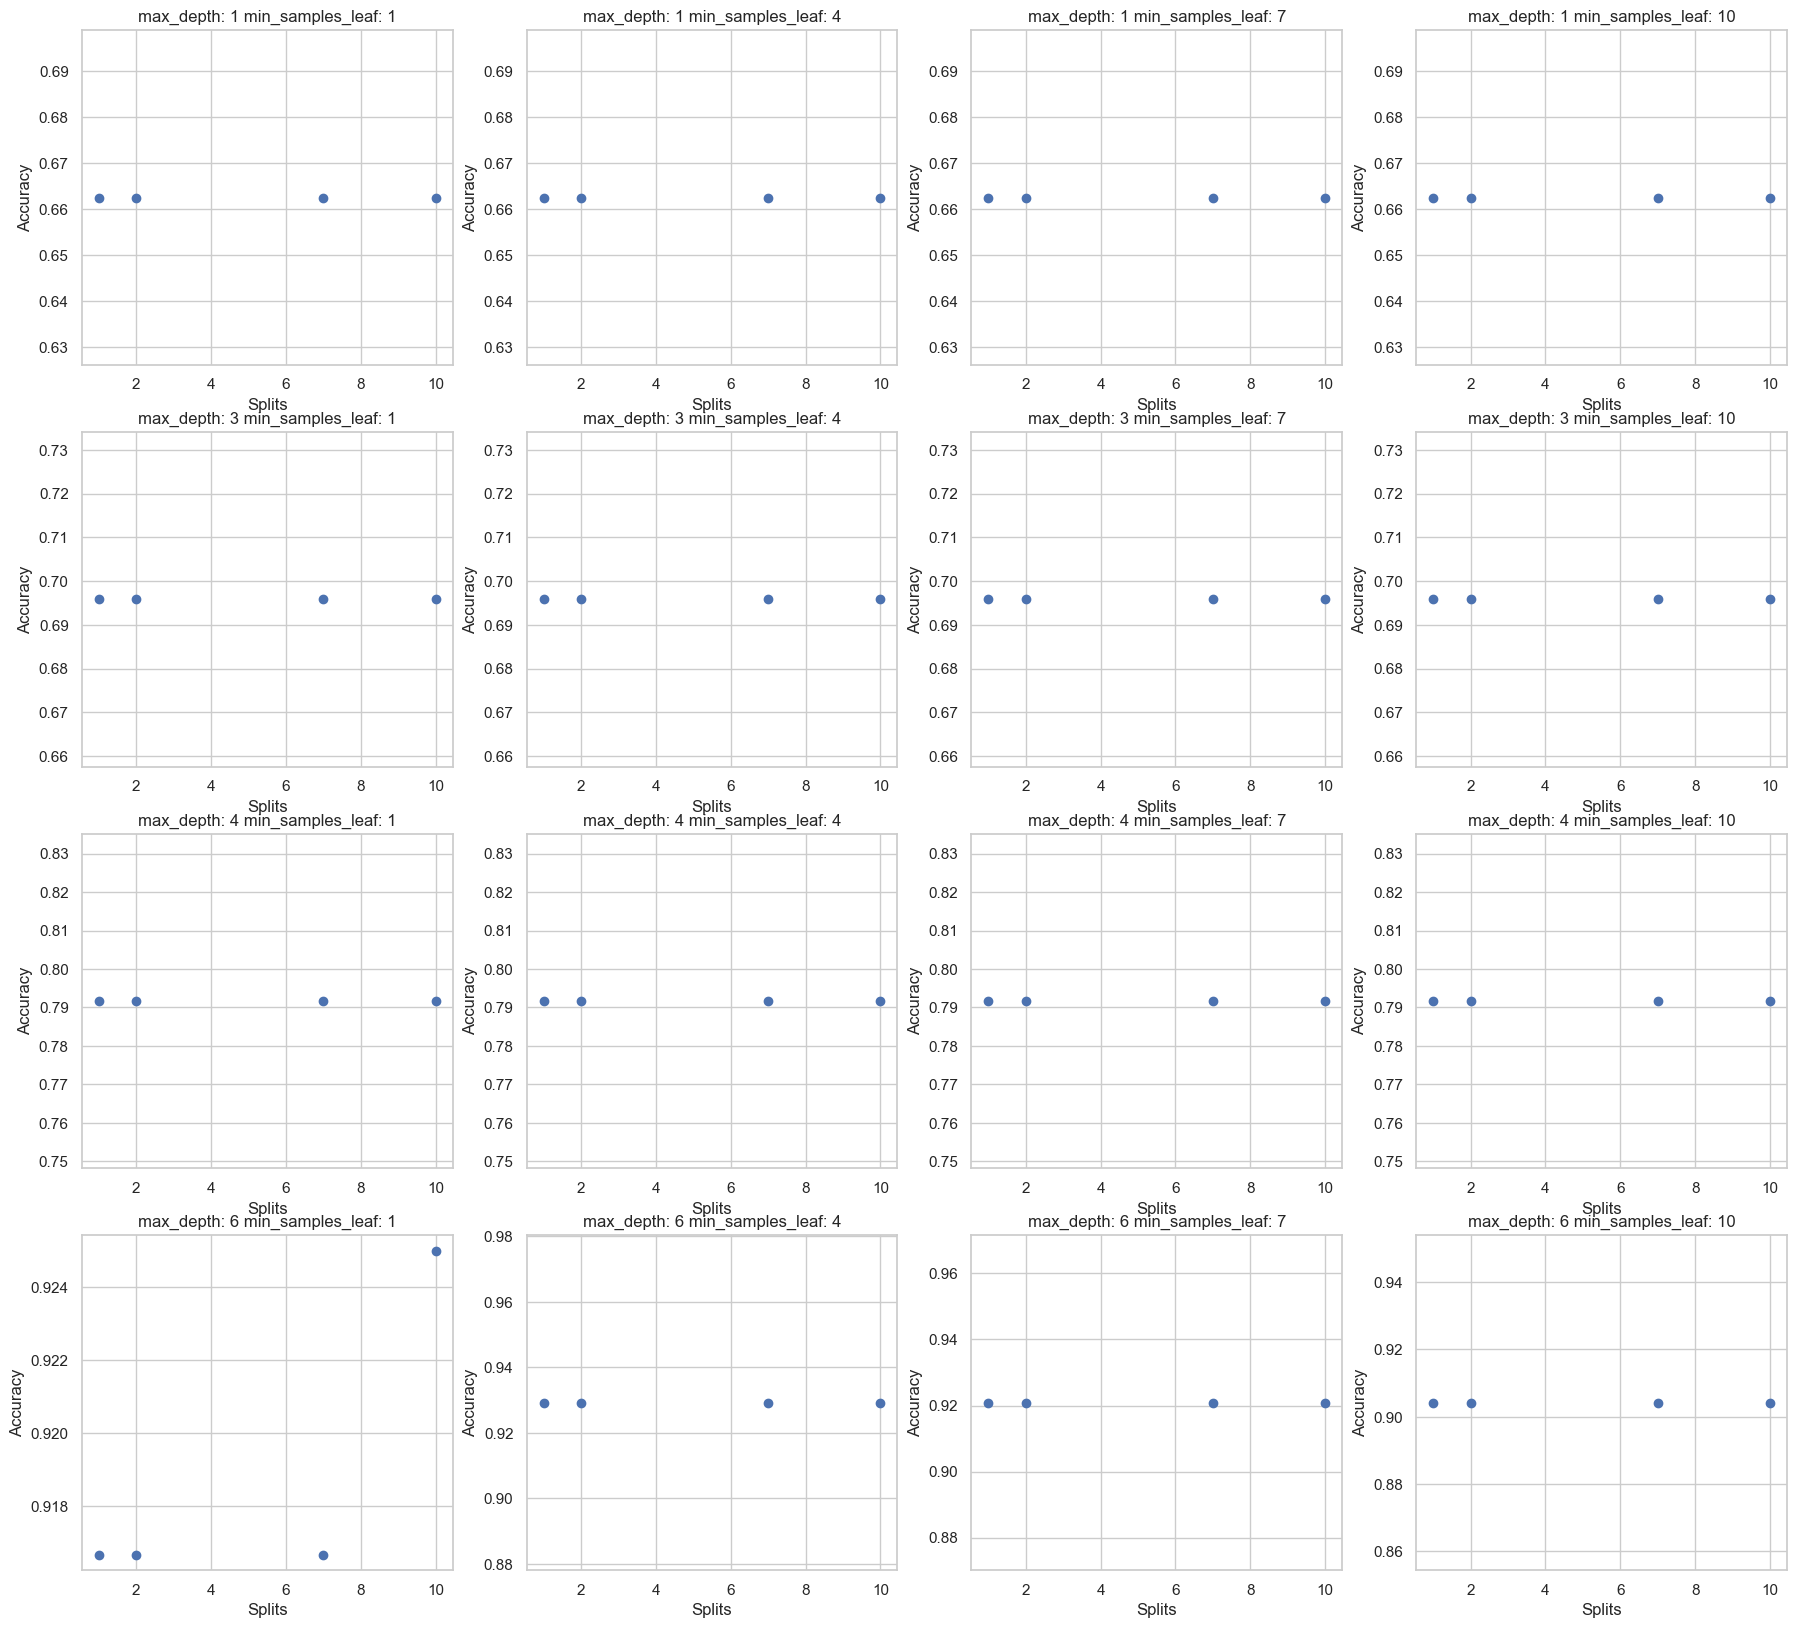

<Figure size 640x480 with 0 Axes>

In [19]:
import importlib
import hw2code
importlib.reload(hw2code)


dataset_tictactoe = pd.read_csv('datasets/tic-tac-toe-endgame.csv')

encoders = []
encode_dataset_tictactoe = dataset_tictactoe.copy()
for feature in dataset_tictactoe.columns:
    encoder = LabelEncoder()
    encoders.append(encoder)
    encode_dataset_tictactoe[feature] = encoder.fit_transform(dataset_tictactoe[feature])

dataset_tictactoe_features = encode_dataset_tictactoe.iloc[:, :-1]
dataset_tictactoe_target = encode_dataset_tictactoe.iloc[:, -1]
max_depths = [1, 3, 4, 6]
min_samples_leafs = [1, 4, 7, 10]
min_samples_splits = [1, 2, 7, 10]
X_train, X_test, y_train, y_test = train_test_split(dataset_tictactoe_features, dataset_tictactoe_target)
fig, ax = plt.subplots(len(max_depths), len(min_samples_leafs), figsize=(22, 20))
for j, d in enumerate(max_depths):
    for i, leaf in enumerate(min_samples_leafs):
        accuracy_mas = []
        for split in min_samples_splits:
            tree = DecisionTree(
                ['categorical']* dataset_tictactoe_features.shape[1],
                max_depth=d,
                min_samples_leaf=leaf,
                min_samples_split=split
            )
            tree.fit(X_train.values, y_train.values)
            y_pred_test = tree.predict(X_test.values)
            accuracy = accuracy_score(y_test, y_pred_test)
            accuracy_mas.append(accuracy)
        print(accuracy_mas)
        ax[j, i].scatter(min_samples_splits, accuracy_mas)
        ax[j, i].set_title(f'max_depth: {d} min_samples_leaf: {leaf}')
        ax[j, i].set_xlabel('Splits')
        ax[j, i].set_ylabel('Accuracy')
plt.show()
plt.tight_layout()

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [20]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import cross_val_score


import importlib
import hw2code
importlib.reload(hw2code)


results = {'mushrooms': [], 'tic-tac-toe': [], 'car': [], 'nursery': []}

datasets = [
    'datasets/agaricus-lepiota.data',
    'datasets/tic-tac-toe-endgame.csv',
    'datasets/car.data',
    'datasets/nursery.data'
]


dataset = pd.read_csv(datasets[0])
encoders = []
encode_dataset = dataset.copy()
for feature in dataset.columns:
    encoder = LabelEncoder()
    encoders.append(encoder)
    encode_dataset[feature] = encoder.fit_transform(dataset[feature])

features = encode_dataset.iloc[:, 1:]
target = encode_dataset.iloc[:, 0]
X_train = features
y_train = target


onehot = OneHotEncoder(sparse_output=False)
X_train_onehot = onehot.fit_transform(X_train)
scorer = make_scorer(accuracy_score)

tree11 = DecisionTree(['real'] * features.shape[1])
tree12 = DecisionTree(['categorical'] * features.shape[1])
tree13 = DecisionTree(['real'] * X_train_onehot.shape[1])
tree14 = DecisionTreeClassifier()

score1 = cross_val_score(tree11, X_train.values, y_train.values, cv=10, scoring=scorer)
score2 = cross_val_score(tree12, X_train.values, y_train.values, cv=10, scoring=scorer)
score3 = cross_val_score(tree13, X_train_onehot, y_train.values, cv=10, scoring=scorer, error_score='raise')
score4 = cross_val_score(tree14, X_train.values, y_train.values, cv=10, scoring=scorer)
results['mushrooms'] = [score1.mean(), score2.mean(), score3.mean(), score4.mean()]
print(results)


dataset = pd.read_csv(datasets[1])
encoders = []
encode_dataset = dataset.copy()
for feature in dataset.columns:
    encoder = LabelEncoder()
    encoders.append(encoder)
    encode_dataset[feature] = encoder.fit_transform(dataset[feature])

features = encode_dataset.iloc[:, :-1]
target = encode_dataset.iloc[:, -1]
X_train = features
y_train = target


onehot = OneHotEncoder(sparse_output=False)
X_train_onehot = onehot.fit_transform(X_train)
scorer = make_scorer(accuracy_score)

tree11 = DecisionTree(['real'] * features.shape[1])
tree12 = DecisionTree(['categorical'] * features.shape[1])
tree13 = DecisionTree(['real'] * X_train_onehot.shape[1])
tree14 = DecisionTreeClassifier()

score1 = cross_val_score(tree11, X_train.values, y_train.values, cv=10, scoring=scorer)
score2 = cross_val_score(tree12, X_train.values, y_train.values, cv=10, scoring=scorer)
score3 = cross_val_score(tree13, X_train_onehot, y_train.values, cv=10, scoring=scorer, error_score='raise')
score4 = cross_val_score(tree14, X_train.values, y_train.values, cv=10, scoring=scorer)
results['tic-tac-toe'] = [score1.mean(), score2.mean(), score3.mean(), score4.mean()]
print(results)


dataset = pd.read_csv(datasets[2])
mapping = {
    'unacc': 0,
    'acc': 0,
    'good': 1,
    'vgood': 1
}
dataset[dataset.columns[-1]] = dataset[dataset.columns[-1]].map(mapping)
encoders = []
encode_dataset = dataset.copy()
for feature in dataset.columns:
    encoder = LabelEncoder()
    encoders.append(encoder)
    encode_dataset[feature] = encoder.fit_transform(dataset[feature])

features = encode_dataset.iloc[:, :-1]
target = encode_dataset.iloc[:, -1]
X_train = features
y_train = target


onehot = OneHotEncoder(sparse_output=False)
X_train_onehot = onehot.fit_transform(X_train)
scorer = make_scorer(accuracy_score)

tree11 = DecisionTree(['real'] * features.shape[1])
tree12 = DecisionTree(['categorical'] * features.shape[1])
tree13 = DecisionTree(['real'] * X_train_onehot.shape[1])
tree14 = DecisionTreeClassifier()

score1 = cross_val_score(tree11, X_train.values, y_train.values, cv=10, scoring=scorer)
score2 = cross_val_score(tree12, X_train.values, y_train.values, cv=10, scoring=scorer)
score3 = cross_val_score(tree13, X_train_onehot, y_train.values, cv=10, scoring=scorer, error_score='raise')
score4 = cross_val_score(tree14, X_train.values, y_train.values, cv=10, scoring=scorer)
results['car'] = [score1.mean(), score2.mean(), score3.mean(), score4.mean()]
print(results)

dataset = pd.read_csv(datasets[3])
mapping = {
    'not_recom': 0,
    'recommend': 0,
    'very_recom': 1,
    'spec_prior': 1
}
dataset[dataset.columns[-1]] = dataset[dataset.columns[-1]].map(mapping)
encoders = []
encode_dataset = dataset.copy()
for feature in dataset.columns:
    encoder = LabelEncoder()
    encoders.append(encoder)
    encode_dataset[feature] = encoder.fit_transform(dataset[feature])

features = encode_dataset.iloc[:, :-1]
target = encode_dataset.iloc[:, -1]
X_train = features
y_train = target


onehot = OneHotEncoder(sparse_output=False)
X_train_onehot = onehot.fit_transform(X_train)
scorer = make_scorer(accuracy_score)

tree11 = DecisionTree(['real'] * features.shape[1])
tree12 = DecisionTree(['categorical'] * features.shape[1])
tree13 = DecisionTree(['real'] * X_train_onehot.shape[1])
tree14 = DecisionTreeClassifier()

score1 = cross_val_score(tree11, X_train.values, y_train.values, cv=10, scoring=scorer)
score2 = cross_val_score(tree12, X_train.values, y_train.values, cv=10, scoring=scorer)
score3 = cross_val_score(tree13, X_train_onehot, y_train.values, cv=10, scoring=scorer, error_score='raise')
score4 = cross_val_score(tree14, X_train.values, y_train.values, cv=10, scoring=scorer)
results['nursery'] = [score1.mean(), score2.mean(), score3.mean(), score4.mean()]

res = pd.DataFrame(results)
res.to_csv('res.csv', index=False)

{'mushrooms': [np.float64(0.9992610837438424), np.float64(1.0), np.float64(0.9996305418719211), np.float64(0.9627233562976023)], 'tic-tac-toe': [], 'car': [], 'nursery': []}
{'mushrooms': [np.float64(0.9992610837438424), np.float64(1.0), np.float64(0.9996305418719211), np.float64(0.9627233562976023)], 'tic-tac-toe': [np.float64(0.4675328947368421), np.float64(0.5414583333333333), np.float64(0.5435745614035088), np.float64(0.758157894736842)], 'car': [], 'nursery': []}
{'mushrooms': [np.float64(0.9992610837438424), np.float64(1.0), np.float64(0.9996305418719211), np.float64(0.9627233562976023)], 'tic-tac-toe': [np.float64(0.4675328947368421), np.float64(0.5414583333333333), np.float64(0.5435745614035088), np.float64(0.758157894736842)], 'car': [np.float64(0.9425998118026616), np.float64(0.9675191558005108), np.float64(0.9217670385804544), np.float64(0.9449522785320607)], 'nursery': []}


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента.
Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.

Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** Результаты ранжируются не одинаково, в датасете 'tic-tac-toe' лидерство занимает реализация из sklearn, однако в остальных она не показывает лучшие результаты. также как и DecisionTree с категориальными типами, она проседает в 'nursery', но показывает лучшие результаты в 'mushrooms' и 'car'. Вообще можно заметить, что на датасете 'tic-tac-toe' заметно проседаются результаты, возможно это происходит из-за того что очень много комбинаций и при кросс-валидации нам могут попасться данные, не похожие на те, что мы обучали.  Я думаю, что можно было бы попробовать кросс валидацию, где у нас деление происходит не последовательно, а в случайном порядке.

Вставьте что угодно, описывающее ваши впечатления от этого задания: